In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import re
import numpy as np

In [2]:
def load_images_from_folder(folder, numeric_name = False):
    '''
    Input:
    folder: path y nombre de la carpeta con las imagenes 
    numeric_name: borrar letras de los nombres de las imagenes al cargar a la lista
    Output:
    images: lista con las imagenes cargadas
    img_names: lista con el nombre de los archivos sin valores letras, solo numeros'''
    images = []
    img_name = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img[:,:,0])
            if (numeric_name):
                img_name.append(re.sub("[^0-9]", "", filename))
            else:
                img_name.append(filename)
    return images,img_name


In [3]:
images_20, _ = load_images_from_folder('data/images/dia_20', True)
images_91,_ = load_images_from_folder('data/images/dia_91', True)
images_277, _ = load_images_from_folder('data/images/dia_277', True)
images_305, _ = load_images_from_folder('data/images/dia_305', True)

144


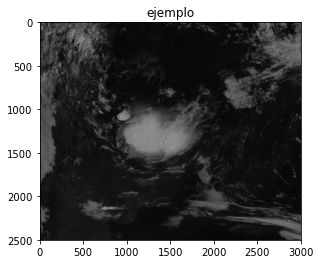

In [5]:
print(len(images_20))
plt.title('ejemplo')
plt.imshow(images_20[70],cmap='gray')
plt.show()

In [6]:
print(np.shape(images_20[80]))
print(images_20[80][1250,1100])

(2501, 3001)
92


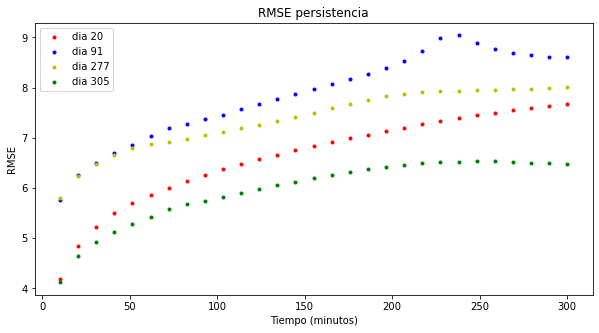

In [15]:
i0 =80

prediccion20 = images_20[i0]
prediccion91 = images_91[i0]
prediccion277 = images_277[i0]
prediccion305 = images_305[i0]

errores20 = []
errores91 = []
errores277 = []
errores305 = []


for i in range(i0+1, i0+30):
    rmse20 = np.sqrt(np.mean((images_20[i] - prediccion20)**2))
    rmse91 = np.sqrt(np.mean((images_91[i] - prediccion91)**2))
    rmse277 = np.sqrt(np.mean((images_277[i] - prediccion277)**2))
    rmse305 = np.sqrt(np.mean((images_305[i] - prediccion305)**2))
    errores20.append(rmse20)
    errores91.append(rmse91)
    errores277.append(rmse277)
    errores305.append(rmse305)
    

tiempo = np.linspace(10,300,29)

plt.figure(figsize=(10, 5))
#plt.plot(tiempo,errores20, 'r.',tiempo,errores91,'b.',tiempo,errores277,'y.',tiempo,errores305,'g.')
l1, = plt.plot(tiempo,errores20, 'r.')
l2, = plt.plot(tiempo,errores91 ,'b.')
l3, = plt.plot(tiempo,errores277 ,'y.')
l4, = plt.plot(tiempo,errores305 ,'g.')
plt.legend((l1, l2, l3,l4), ['dia 20', 'dia 91','dia 277','dia 305'])
plt.xlabel('Tiempo (minutos)') 
plt.ylabel('RMSE') 
plt.title('RMSE persistencia') 
plt.show()